In [1]:


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [2]:
X,Y=load_iris(return_X_y=True)

column=load_iris().feature_names
print(column)
print(X.shape)
print(Y.shape)



x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150,)


In [3]:

class My_kMeans:

  def __init__(self,n_clusters=3,max_iter=100):
    self.n_clusters=n_clusters
    self.max_iter=max_iter
    self.clusters=[]
    self.inertia_=0

  def distance(self,x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

  def fit(self,x_train):

    #intialize clusters midpoints
    clusters=[]
    for  i in range(self.n_clusters):
      center = np.random.uniform(low=np.min(x_train, axis=0), high=np.max(x_train, axis=0), size=x_train.shape[1])
      cluster={
          'center':center,
          'points':[]
      }
      self.clusters.append(cluster)

    #finding accurate midpointss for clusters on basis of distances
    for _ in range(self.max_iter):
      for i in range(len(x_train)):
        point=x_train[i]

        dis=[]
        for i in range(self.n_clusters):
          dis.append(self.distance(point,self.clusters[i]['center']))


        #finding nearest cluster and adding current point to that cluster
        cluster_idx=np.argmin(dis)
        self.clusters[cluster_idx]['points'].append(point)



      for i in range(self.n_clusters):
        points=self.clusters[i]['points']
        if len(points)>0:
          self.clusters[i]['center']=np.mean(points,axis=0)





  def predict(self,x_test):

    dis=[]

    for i in range(self.n_clusters):
      dis.append(self.distance(x_test,self.clusters[i]['center']))

    cluster_idx=np.argmin(dis)
    return cluster_idx





centers of 3 clusters
[4.99797571 3.43595878 1.49228316 0.26307202]
[6.86656755 3.11157777 5.76045345 2.06376138]
[5.89725831 2.74456439 4.42103554 1.44732518]


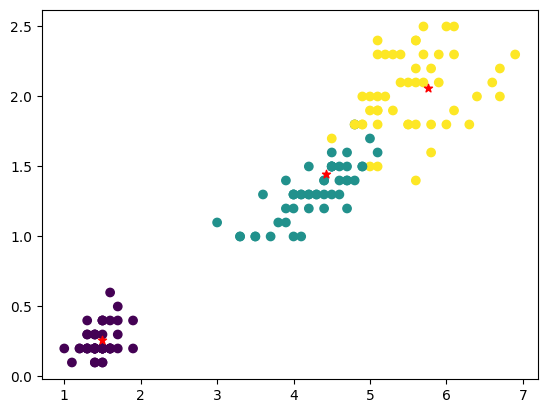

In [12]:


mkm=My_kMeans(n_clusters=3,max_iter=200)
mkm.fit(x_train)
mkm.predict(x_test=x_test)

print("centers of 3 clusters")
for i in range(3):
  print(mkm.clusters[i]['center'])
# plt.scatter(x_train[:,2],x_train[:,3],c=y_train)


plt.scatter(x_train[:,2],x_train[:,3],c=y_train)
plt.scatter(x_test[:,2],x_test[:,3],c=y_test)

for i in range(3):
  c=mkm.clusters[i]['center']
  plt.scatter(c[2],c[3],c='red',marker='*')

plt.show()

centers of 3 clusters
[5.85686275 2.73137255 4.38627451 1.44313725]
[4.99   3.4525 1.45   0.245 ]
[6.85517241 3.10344828 5.70689655 2.02068966]


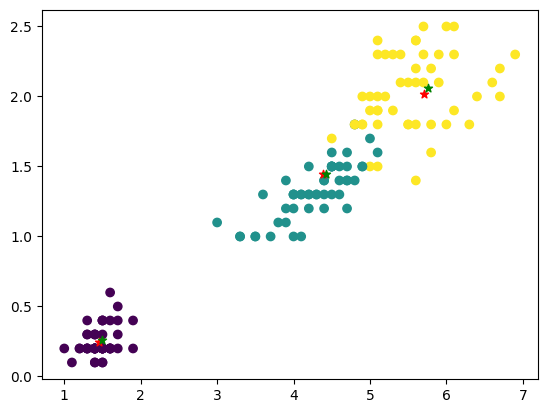

In [14]:


#sklearn k_means


skm=KMeans(n_clusters=3,max_iter=100)
skm.fit(x_train)
clus=skm.cluster_centers_

print("centers of 3 clusters")
for i in clus:
 print(i)


plt.scatter(x_train[:,2],x_train[:,3],c=y_train)
plt.scatter(x_test[:,2],x_test[:,3],c=y_test)

for i in clus:
  plt.scatter(i[2],i[3],c='red',marker='*')

for i in range(3):
  c=mkm.clusters[i]['center']
  plt.scatter(c[2],c[3],c='green',marker='*')

plt.show()




above, the centres of clusters match with the sklearn clusters centre.